# Using the Poisson process

> If we know that a scenario follows the Poisson process, can we use the properties of the Poisson and exponential models to make decisions?

Outline

- Describe the scenario
    - Does the number of goals per game and the waiting time between goals follow the Poisson process?
- What is the Poisson process?
- Methodoloy
    - Number of goals per game $\to$ Poisson
    - Waiting time between goals $\to$ exponential
    - Rate of goals over the period
- Results
- Discussion

In [1]:
from scripts.data import Data
from scipy.stats import poisson, expon
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample = Data.load_goals()

## Results

### Number of goals per game

Does $X$, the number of goals per game, look like a **Poisson distribution**?

- wrangle the data
- describe the data
- plot the distribution 
- plot the Poisson($\overline{X}$) distribution

In [3]:
sample.head()

,game_id,minute,player,team1score,team2score
0,1,18,Schiavio,1,0
1,1,20,Orsi,2,0
2,1,29,Schiavio,3,0
3,1,57,Donelli,3,1
4,1,63,Ferrari,4,1


In [4]:
# drop parameters not needed for model
sample.drop(columns=["player", "team1score", "team2score"], inplace=True)

In [5]:
# countif game_id
x = sample.groupby("game_id")["game_id"].count()

In [6]:
# x.reset_index(inplace=True, drop=True)

In [7]:
x.head()

game_id
1    8
2    5
3    7
4    3
5    5
Name: game_id, dtype: int64

In [8]:
x.describe()

count    709.000000
mean       3.112835
std        1.852229
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: game_id, dtype: float64

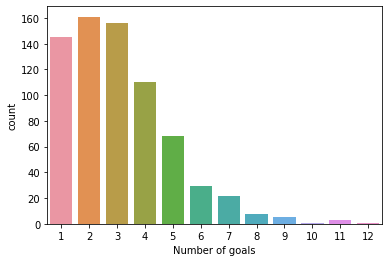

In [11]:
ax = sns.countplot(x=x)
ax.set(xlabel="Number of goals")
plt.show()

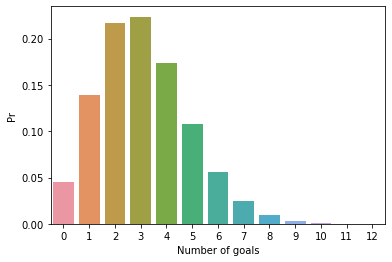

In [14]:
# compared to a Poisson(3.1)
# declare the distribution
pois = poisson(3.1)
r = np.arange(0, 13)
pr = np.array(pois.pmf(r))
ax = sns.barplot(x=r, y=pr)
ax.set(xlabel="Number of goals", ylabel="Pr")
plt.show()

## Waiting time between goals